# Analisi del Dataset e Pre Processing

In questa fase introduttiva, esamineremo il dataset per comprenderne la struttura e le caratteristiche principali.
Il nostro obiettivo sarà individuare eventuali problemi, come celle vuote o dati inconsistenti, e risolverli, oltre ad analizzare la correlazione tra la colonna target e le altre variabili presenti.


### Analisi dei dati
Per iniziare, importiamo le librerie necessarie e carichiamo il dataset.
In questa fase eseguiremo una prima lettura dei dati per osservare la loro struttura e tipologia.

In [36]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

Implementiamo la libreria pandas in modo da poter modellare il dataset.
Utilizziamo Pandas per modellare il dataset e verificarne la struttura, in particolare:
- head() permette di visualizzare le prime righe
- describe() permette di ottenere statistiche descrittive
- info() permette di controllare i tipi di dati e la presenza di eventuali valori nulli

In [37]:
movies = pd.read_csv('../../originale/dataset.csv')
movies.head()

,Unnamed: 0,id,title,type,description,release_year,runtime,genres,production_countries,seasons,...,imdb_votes,tmdb_popularity,tmdb_score,streaming_service,main_genre,name,budget,nconst,primaryName,subscription_cost
0,0,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,61,"['western', 'action', 'romance']",US,0.0,...,1213.0,4.079,4.700000,amazon,western,"['John Wayne', 'Barbara Sheldon', 'Lloyd Whitl...",0.0,nm0102908,Robert N. Bradbury,14.99 CAD / month
1,1,tm1000022,Boonie Bears: The Wild Life,MOVIE,Bear brothers Briar and Bramble set off on an ...,2021,99,"['scifi', 'animation']",CN,0.0,...,117.0,6.135,3.800000,amazon,scifi,"['Chris Boike', 'Nikki Stinson', 'Tan Xiao', '...",NaN,nm5694753,Leon Ding,14.99 CAD / month
2,2,tm1000169,Bad Cupid,MOVIE,Archie is a God on a mission to ensure that tr...,2021,81,"['romance', 'comedy']",US,0.0,...,181.0,3.295,4.800000,amazon,romance,"['John Rhys-Davies', 'Shane Nepveu', 'Briana M...",NaN,nm1526422,Diane Cossa,14.99 CAD / month
3,3,tm1000186,Carol's Christmas,MOVIE,Scrooge encounters the ghost of her late busin...,2021,70,"['drama', 'thriller']",US,0.0,...,48.0,0.600,5.989918,amazon,drama,[nan],NaN,nm5211977,David S Womack,14.99 CAD / month
4,4,tm1000203,Digging to Death,MOVIE,David Van Owen moves into a mysterious house a...,2021,96,"['horror', 'thriller']",US,0.0,...,464.0,3.543,5.800000,amazon,horror,"['Ford Austin', 'Tom Fitzpatrick', 'Rachel Ali...",NaN,nm3810788,Michael P. Blevins,14.99 CAD / month


In [38]:
movies.describe()

,Unnamed: 0,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,budget
count,18719.00000,18719.000000,18719.000000,18719.0,18719.000000,1.871900e+04,18719.000000,18719.000000,6.335000e+03
mean,9359.00000,2001.818847,95.312944,0.0,6.011720,2.674374e+04,13.118934,6.083898,1.416556e+07
std,5403.85418,25.499656,26.308532,0.0,1.255525,1.108678e+05,63.821552,1.240955,3.478821e+07
min,0.00000,1912.000000,0.000000,0.0,0.500000,5.000000e+00,0.000153,0.500000,0.000000e+00
25%,4679.50000,1996.000000,82.000000,0.0,5.300000,2.180000e+02,1.803500,5.500000,0.000000e+00
50%,9359.00000,2014.000000,93.000000,0.0,6.100000,1.027000e+03,3.790000,6.100000,0.000000e+00
75%,14038.50000,2018.000000,108.000000,0.0,6.900000,6.711000e+03,9.298500,6.900000,9.000000e+06
max,18718.00000,2022.000000,549.000000,0.0,10.000000,2.555504e+06,4447.894000,10.000000,3.800000e+08


In [39]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18719 entries, 0 to 18718
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            18719 non-null  int64  
 1   id                    18719 non-null  object 
 2   title                 18719 non-null  object 
 3   type                  18719 non-null  object 
 4   description           18719 non-null  object 
 5   release_year          18719 non-null  int64  
 6   runtime               18719 non-null  int64  
 7   genres                18719 non-null  object 
 8   production_countries  18719 non-null  object 
 9   seasons               18719 non-null  float64
 10  imdb_id               18719 non-null  object 
 11  imdb_score            18719 non-null  float64
 12  imdb_votes            18719 non-null  float64
 13  tmdb_popularity       18719 non-null  float64
 14  tmdb_score            18719 non-null  float64
 15  streaming_service  

Dopo la fase di analisi del dataset passiamo alla fase di pre-processing. In questa fase effettueremo una 'pulizia' dei dati.

In [40]:
columns_to_drop = ['type', 'seasons', 'production_countries', 'imdb_id', 'imdb_votes', 'tmdb_popularity', 'genres', 'budget', 'nconst', 'primaryName']
movies = movies.drop(columns=columns_to_drop, errors='ignore')
movies.head()

,Unnamed: 0,id,title,description,release_year,runtime,imdb_score,tmdb_score,streaming_service,main_genre,name,subscription_cost
0,0,tm100001,The Lucky Texan,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,61,5.6,4.700000,amazon,western,"['John Wayne', 'Barbara Sheldon', 'Lloyd Whitl...",14.99 CAD / month
1,1,tm1000022,Boonie Bears: The Wild Life,Bear brothers Briar and Bramble set off on an ...,2021,99,5.4,3.800000,amazon,scifi,"['Chris Boike', 'Nikki Stinson', 'Tan Xiao', '...",14.99 CAD / month
2,2,tm1000169,Bad Cupid,Archie is a God on a mission to ensure that tr...,2021,81,4.4,4.800000,amazon,romance,"['John Rhys-Davies', 'Shane Nepveu', 'Briana M...",14.99 CAD / month
3,3,tm1000186,Carol's Christmas,Scrooge encounters the ghost of her late busin...,2021,70,2.0,5.989918,amazon,drama,[nan],14.99 CAD / month
4,4,tm1000203,Digging to Death,David Van Owen moves into a mysterious house a...,2021,96,4.5,5.800000,amazon,horror,"['Ford Austin', 'Tom Fitzpatrick', 'Rachel Ali...",14.99 CAD / month


Abbiamo rimosso le colonne che crediamo non diano valore al processo. In particolare:
- 'type': il dataset è composto esclusivamente da film, quindi la distinzione per tipo non è necessaria
- 'seasons': non sono presenti serie TV, quindi stagioni.
- 'imdb_id': identificativo non utile al nostro scopo
- 'genres': è necessario il solo genere principale
- 'budget': questo campo non è utile alla nostra ricerca e presenta un grande numero di valori nulli.
- 'nconst': identificativo non utile al nostro scopo
- 'primaryName': non necessario per la ricerca

Eseguiamo alcune operazioni di pulizia come la rimozione di prefissi e simboli non necessari nelle colonne id, description e name

In [41]:
df = pd.DataFrame(movies)

df['id'] = df['id'].str.replace('^tm', '', regex=True)
df['description'] = df['description'].str.replace('"', '', regex=False)
df['name'] = df['name'].str.replace("'", "", regex=False)

df.to_csv('standard_dataset.csv', index=False)

Arrotondiamo le valutazioni 'imdb_score' e 'tmdb_score' alla prima cifra decimale per maggiore uniformità dei dati

In [42]:
movies[['imdb_score', 'tmdb_score']].describe()

,imdb_score,tmdb_score
count,18719.000000,18719.000000
mean,6.011720,6.083898
std,1.255525,1.240955
min,0.500000,0.500000
25%,5.300000,5.500000
50%,6.100000,6.100000
75%,6.900000,6.900000
max,10.000000,10.000000


In [43]:
df = pd.read_csv('standard_dataset.csv')
df['imdb_score'] = df['imdb_score'].round(1) 
df['tmdb_score'] = df['tmdb_score'].round(1)

print(df[['imdb_score', 'tmdb_score']].to_string(index=False))

df.to_csv('renamed_dataset.csv', index=False)

 imdb_score  tmdb_score
        5.6         4.7
        5.4         3.8
        4.4         4.8
        2.0         6.0
        4.5         5.8
        7.5         7.4
        4.0         8.0
        6.9         5.4
        6.9         6.3
        4.5         5.0
        5.1         6.0
        4.7         5.6
        4.1         4.4
        8.0         8.2
        4.0         4.5
        5.7         6.0
        3.5         5.1
        6.1         6.0
        6.3         6.3
        5.7         5.3
        4.8         5.0
        3.3         1.0
        7.3         6.9
        6.9         6.8
        5.2         4.0
        5.7         5.8
        7.0         6.6
        7.0         6.9
        4.2         5.4
        8.0         5.8
        3.8         5.7
        4.4         6.0
        7.4         5.8
        7.1         6.0
        7.8         6.3
        4.3         5.0
        6.1         5.8
        6.8         5.3
        5.0         5.5
        5.2         5.0
        6.1     

Per rendere i nomi più chiari, rinominiamo le colonne 'main_genre', 'name' e 'subscription_cost' rispettivamente con 'genre', 'actors' e 'monthly_subscription_cost'.

In [44]:
df = pd.read_csv('renamed_dataset.csv')
df.rename(columns={'subscription_cost':'monthly_subscription_cost'}, inplace=True)
df['monthly_subscription_cost'] = df['monthly_subscription_cost'].replace(to_replace=r'\D', value='', regex=True).astype(float)
df['monthly_subscription_cost'] = df['monthly_subscription_cost'] / 100
df.to_csv('pre_processed_dataset.csv', index=False)

print(df['monthly_subscription_cost'])

0        14.99
1        14.99
2        14.99
3        14.99
4        14.99
         ...  
18714     4.99
18715     4.99
18716     4.99
18717     4.99
18718     4.99
Name: monthly_subscription_cost, Length: 18719, dtype: float64


Verifichiamo la presenza di celle vuote nel dataset utilizzando .isnull().sum()

In [45]:
movies.isnull().sum()

Unnamed: 0           0
id                   0
title                0
description          0
release_year         0
runtime              0
imdb_score           0
tmdb_score           0
streaming_service    0
main_genre           0
name                 0
subscription_cost    0
dtype: int64

Dall’analisi risulta che non ci sono valori nulli da gestire, quindi possiamo procedere con l'analisi dei dati.

Per ottenere varie informazioni significative, utilizziamo diversi grafici esplorativi.

### Istogramma che rappresenta la distribuzione dei film tra le piattaforme di streaming

La maggior parte dei dati rilevati dall'istrogramma sono legati alle piattaforme 'Amazon' e 'Netflix'. Questo ci fa credere che le racomandazioni saranno maggiormente indirizzate su queste piattaforme, rispetto ad altre che hanno minore rilevanza.

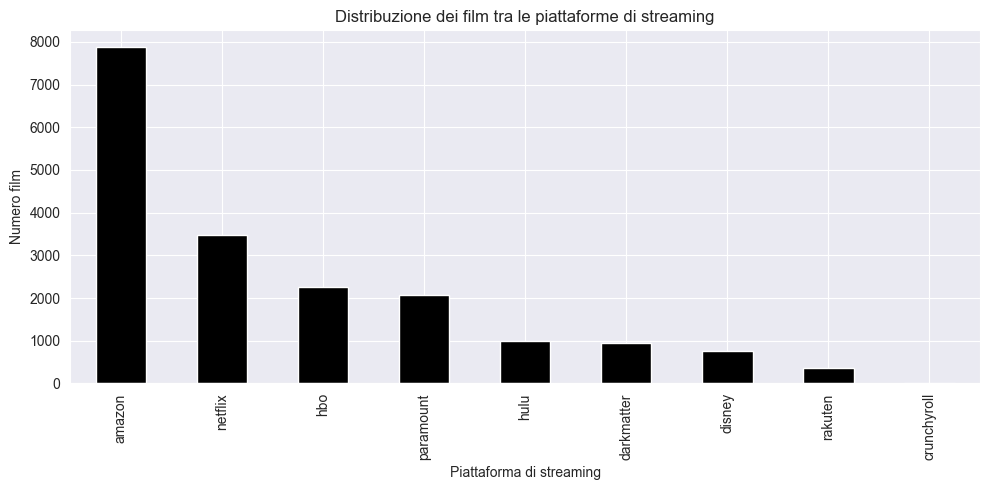

In [46]:
df = pd.DataFrame(movies)
movie_distribution = df['streaming_service'].value_counts()
plt.figure(figsize=(10, 5))
movie_distribution.plot(kind='bar', color='black')
plt.title('Distribuzione dei film tra le piattaforme di streaming')
plt.xlabel('Piattaforma di streaming')
plt.ylabel('Numero film')
plt.grid(True)
plt.tight_layout()

### Istogramma che rappresenta la distribuzione dei generi dei film per ciascuna piattaforma di streaming

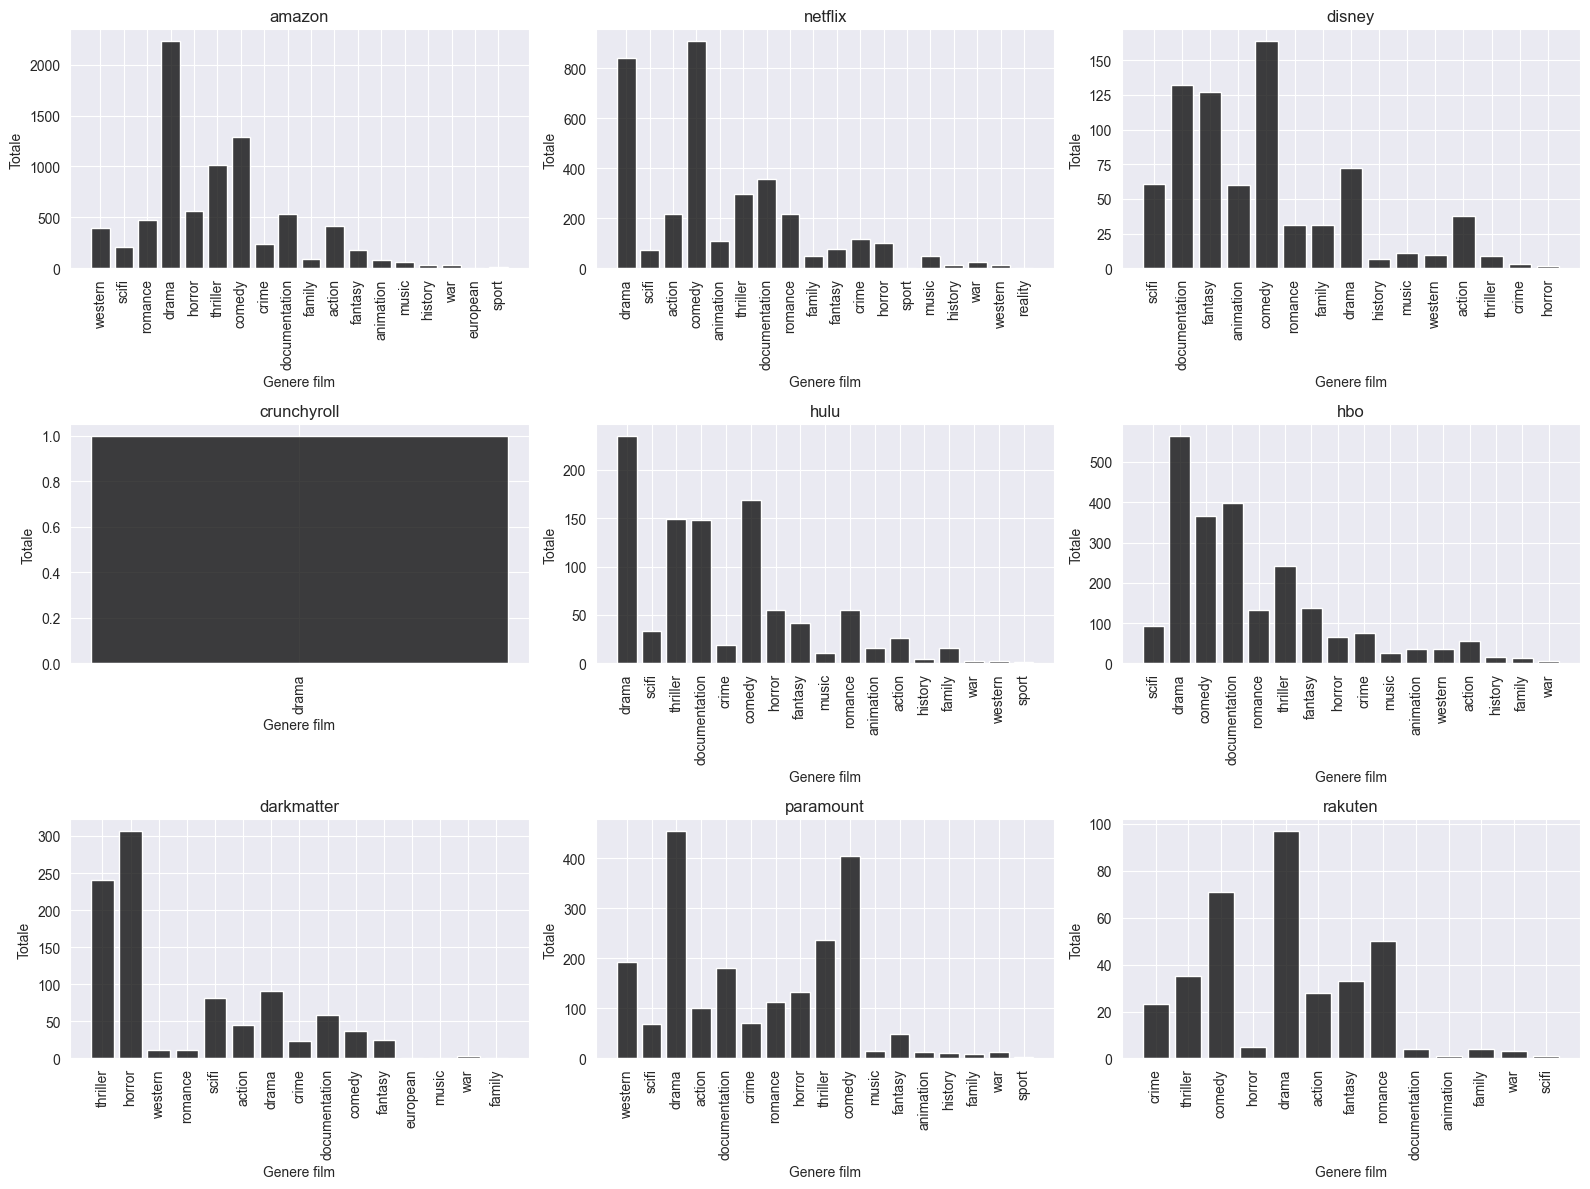

In [47]:
import math

df = pd.DataFrame(movies)
streaming_services = df['streaming_service'].unique()
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
num_services = len(streaming_services)
num_cols = 3
num_rows = math.ceil(num_services / num_cols)

plt.figure(figsize=(16, num_rows * 4))
for i, service in enumerate(streaming_services, 1):
    plt.subplot(num_rows, num_cols, i)
    subset = df[df['streaming_service'] == service]
    sns.histplot(data=subset, x='main_genre', discrete=True, shrink=0.8, color='black')
    
    plt.title(f'{service}')
    plt.xlabel('Genere film')
    plt.ylabel('Totale')
    plt.xticks(rotation=90)
    plt.grid(True)
    
plt.tight_layout()
plt.show()

### Istogramma che rappresenta la distribuzione dei prezzi tra le varie piattaforme di streaming

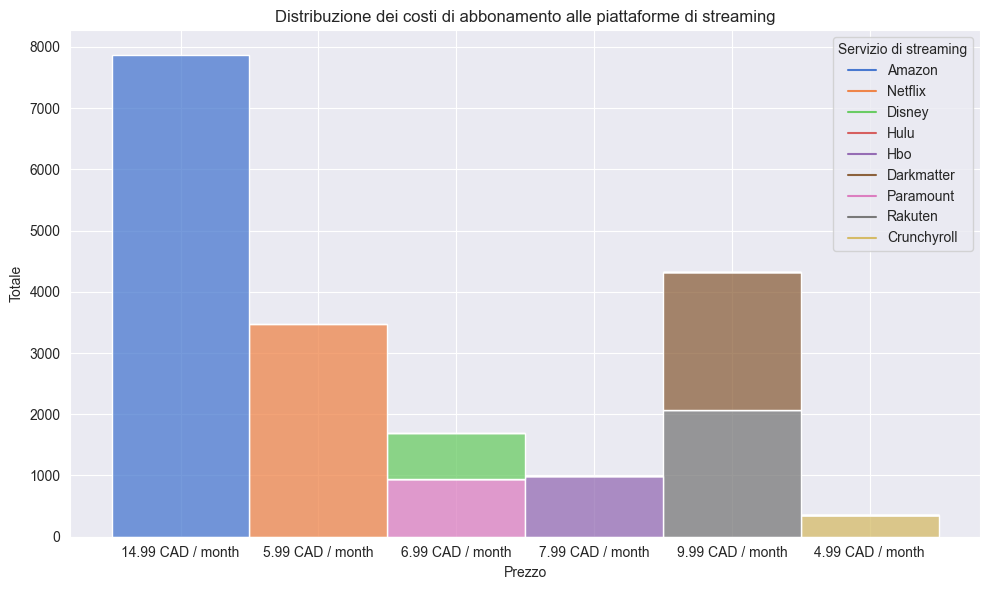

In [48]:
df = pd.DataFrame(movies)
streaming_services=['Amazon', 'Netflix', 'Disney', 'Hulu', 'Hbo', 'Darkmatter', 'Paramount', 'Rakuten', 'Crunchyroll']

plt.figure(figsize=(10, 6))
hist = sns.histplot(data=df, x='subscription_cost', hue='streaming_service', multiple='stack', palette='muted')
plt.title('Distribuzione dei costi di abbonamento alle piattaforme di streaming')
plt.xlabel('Prezzo')
plt.ylabel('Totale')
plt.grid(True)

handles, labels = hist.get_legend_handles_labels()
if not handles:
    palette = sns.color_palette('muted', len(streaming_services))
    color_dict = dict(zip(streaming_services, palette))
    for service in streaming_services:
        handles.append(plt.Line2D([], [], color=color_dict[service], label=service))
plt.legend(handles=handles, title='Servizio di streaming')
plt.tight_layout()
plt.show()

### Grafico a violino che rappresenta la distribuzione delle valutazioni 'imdb_score' e 'tmdb_score

Il grafico mostra la distribuzione delle votazioni per ciascun livello di valutazione.
Ciascun violino rappresenta la variazione delle valutazioni assegnate dalle piattaforme imdb e tmdb rispetto a ciascun titolo.

Notiamo che la maggior parte delle valutazioni assegnate ha valore vicino al 6.

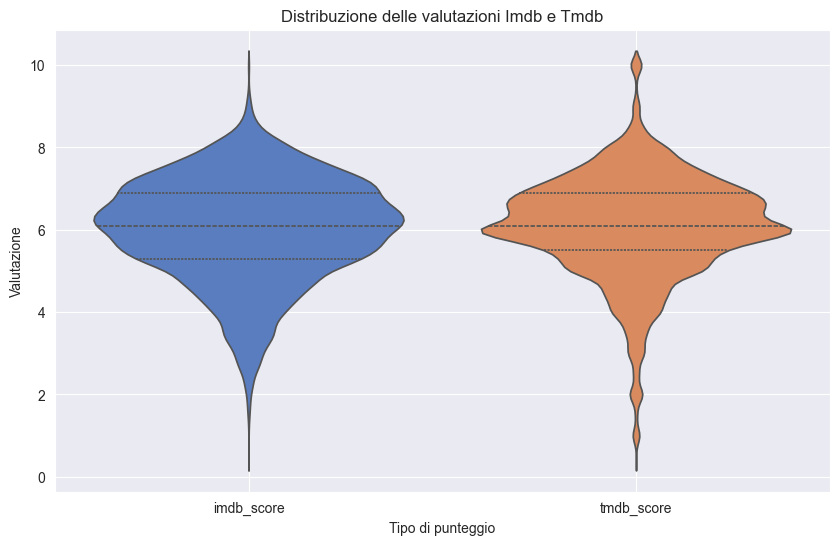

In [49]:
df = pd.DataFrame(movies)

df_long = pd.melt(df, id_vars=['title'], value_vars=['imdb_score', 'tmdb_score'], var_name='score_type', value_name='score')
plt.figure(figsize=(10, 6))
sns.violinplot(x='score_type', y='score', data=df_long, inner='quartile', hue='score_type', palette='muted', legend=False)

plt.title('Distribuzione delle valutazioni Imdb e Tmdb')
plt.xlabel('Tipo di punteggio')
plt.ylabel('Valutazione')
plt.grid(True)

plt.show()